# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f"{url}q={city}&appid={weather_api_key}&units={units}")


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sur
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | constantia
Processing Record 4 of Set 1 | walvis bay
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | utrik
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | gao
Processing Record 10 of Set 1 | la ronge
Processing Record 11 of Set 1 | pyshma
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | aasiaat
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | badger
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | hodmezovasarhely
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | galesong
Processing Record 22 of Set 1 | hamilton
Processing R

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame((city_data))

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sur,22.5667,59.5289,28.75,72,4,3.98,OM,1724357516
1,longyearbyen,78.2186,15.6401,11.91,71,75,4.63,SJ,1724357517
2,constantia,44.1833,28.6500,25.39,63,14,3.24,RO,1724357518
3,walvis bay,-22.9575,14.5053,15.67,62,0,3.60,NA,1724357520
4,lebu,-37.6167,-73.6500,9.03,80,100,4.02,CL,1724357522


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sur,22.5667,59.5289,28.75,72,4,3.98,OM,1724357516
1,longyearbyen,78.2186,15.6401,11.91,71,75,4.63,SJ,1724357517
2,constantia,44.1833,28.6500,25.39,63,14,3.24,RO,1724357518
3,walvis bay,-22.9575,14.5053,15.67,62,0,3.60,NaN,1724357520
4,lebu,-37.6167,-73.6500,9.03,80,100,4.02,CL,1724357522


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

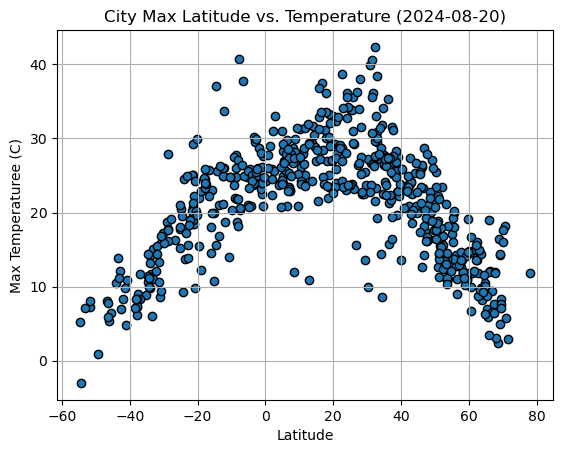

In [9]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(latitude,temp, edgecolor="black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperaturee (C)")
plt.title("City Max Latitude vs. Temperature (2024-08-20)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

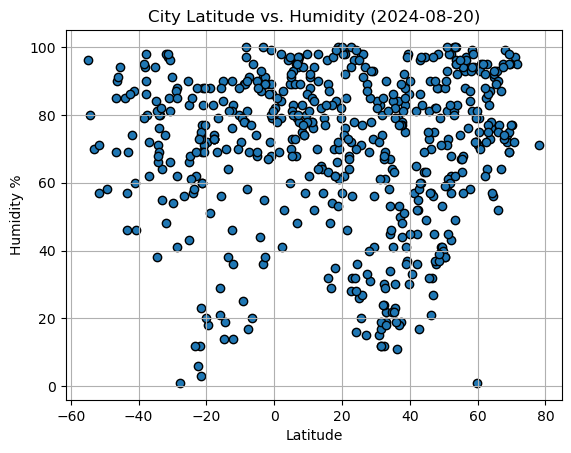

In [10]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(latitude,humidity, edgecolor="black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity (2024-08-20)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

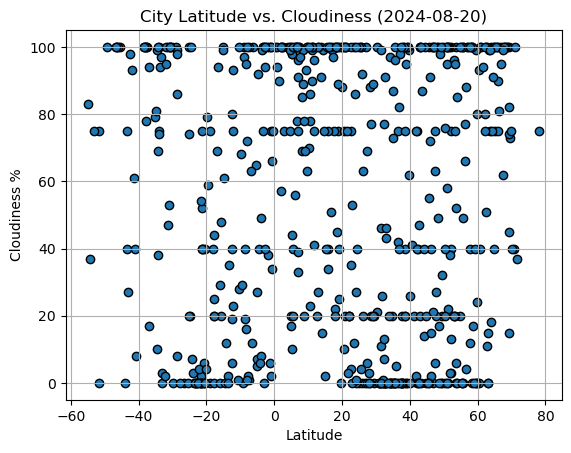

In [11]:
# Build the scatter plots for latitude vs. cloudiness
clou = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(latitude,clou, edgecolor="black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness (2024-08-20)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

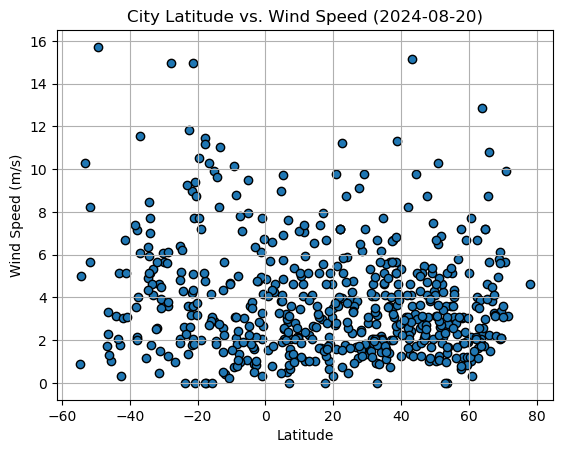

In [12]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(latitude,wind, edgecolor="black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-08-20)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def calculate_linear_regression(x,y, xlabel,ylabel,Title,equation):

    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    regression_line = slope * x + intercept
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regression_line, color='red', label='Fit Line')
    plt.title(Title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line, xy=equation )
   

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
nh_df =  city_data_df.query('Lat >= 0')
nh_lat = nh_df["Lat"]
nh_temp = nh_df["Max Temp"]

# Display sample data
nh_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sur,22.5667,59.5289,28.75,72,4,3.98,OM,1724357516
1,longyearbyen,78.2186,15.6401,11.91,71,75,4.63,SJ,1724357517
2,constantia,44.1833,28.6500,25.39,63,14,3.24,RO,1724357518
5,utrik,11.2278,169.8474,28.13,77,99,7.16,MH,1724357523
7,gao,16.6362,1.6370,37.48,29,51,3.01,ML,1724357526


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
sh_df =  city_data_df.query('Lat < 0')
sh_lat = sh_df["Lat"]
sh_temp = sh_df["Max Temp"]

# Display sample data
sh_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,walvis bay,-22.9575,14.5053,15.67,62,0,3.60,NaN,1724357520
4,lebu,-37.6167,-73.6500,9.03,80,100,4.02,CL,1724357522
6,pisco,-13.7000,-76.2167,21.03,64,2,8.23,PE,1724357486
10,port-aux-francais,-49.3500,70.2167,0.95,58,100,15.72,TF,1724357530
12,port alfred,-33.5906,26.8910,11.77,80,94,1.79,ZA,1724357532


###  Temperature vs. Latitude Linear Regression Plot

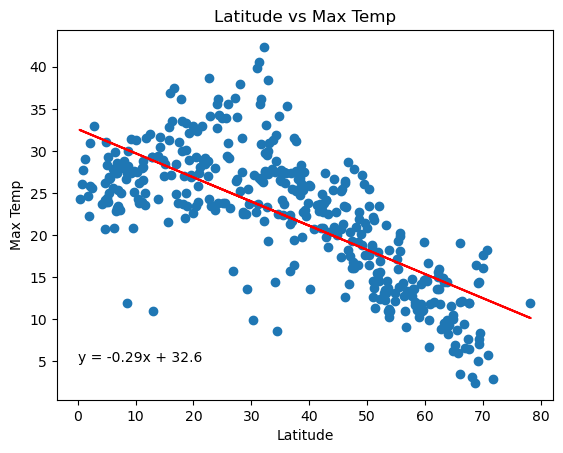

In [23]:
# Linear regression on Northern Hemisphere
calculate_linear_regression(nh_lat, nh_temp, "Latitude", "Max Temp", "Latitude vs Max Temp", (0.05, 5)) 


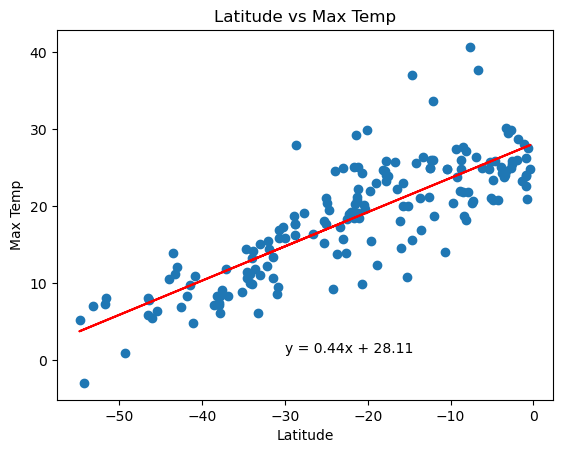

In [20]:
# Linear regression on Southern Hemisphere
calculate_linear_regression(sh_lat, sh_temp, "Latitude", "Max Temp", "Latitude vs Max Temp", (-30, 0.9)) 


**Discussion about the linear relationship:** The Northern Hemispehere scatter plot shows that the higher the latitude, being greater than 0, the greater the temperature drop, there is a negeative correlation. The Southern Hemispehere scatter plot shows that the less the latitude, being less than 0, the greater the temperature increase, there is a positive correlation. 

### Humidity vs. Latitude Linear Regression Plot

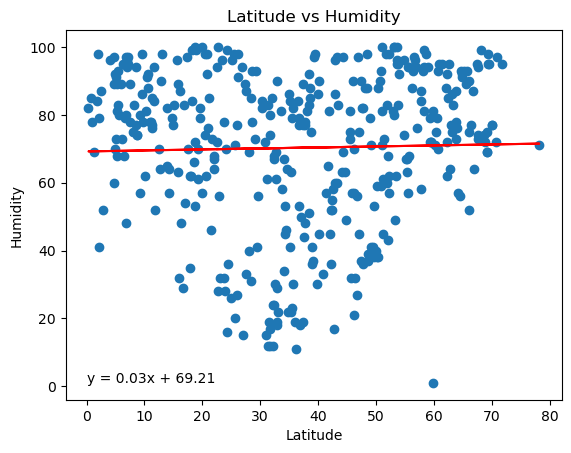

In [25]:
# Northern Hemisphere
nh_hl =  nh_df["Humidity"]
calculate_linear_regression(nh_lat, nh_hl, "Latitude", "Humidity", "Latitude vs Humidity", (0, 0.9)) 

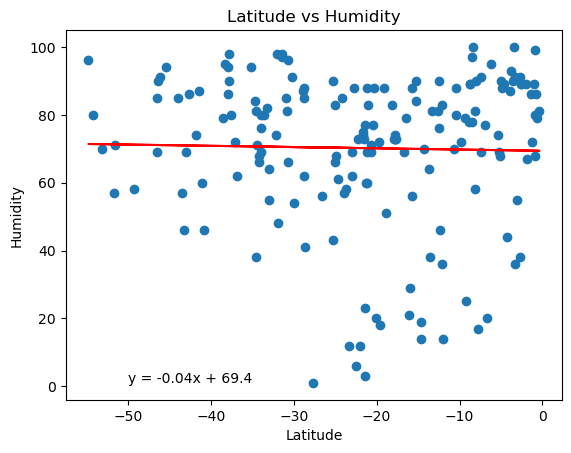

In [27]:
# Southern Hemisphere
sh_hl = sh_df["Humidity"]
calculate_linear_regression(sh_lat, sh_hl, "Latitude", "Humidity", "Latitude vs Humidity", (-50, 0.9)) 

**Discussion about the linear relationship:** In both the Northern and Southern Hemisphere, there is no correlation between humidity levels and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

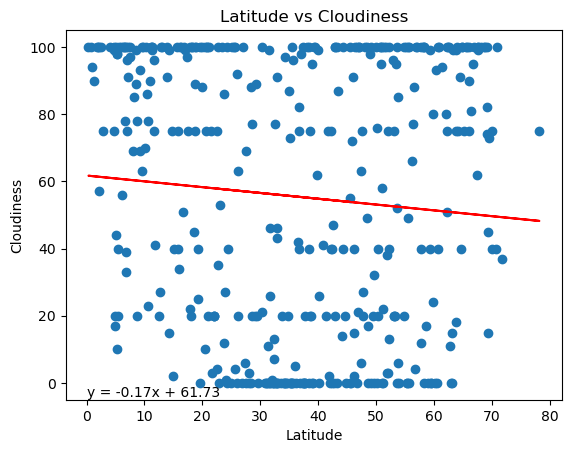

In [31]:
# Northern Hemisphere
nh_c = nh_df["Cloudiness"]
calculate_linear_regression(nh_lat, nh_c, "Latitude", "Cloudiness", "Latitude vs Cloudiness", (0, -4))

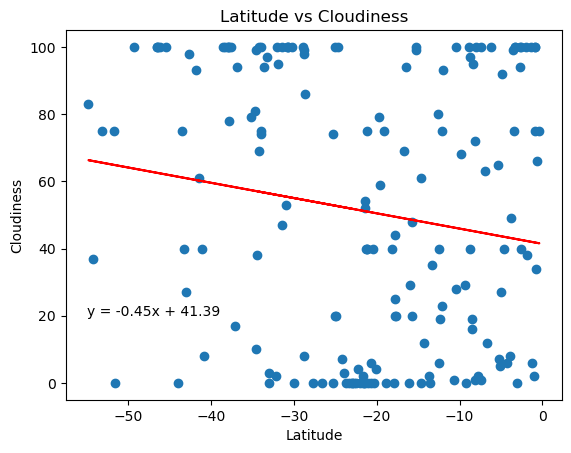

In [33]:
# Southern Hemisphere
sh_c = sh_df["Cloudiness"]
calculate_linear_regression(sh_lat, sh_c, "Latitude", "Cloudiness", "Latitude vs Cloudiness", (-55, 20))

**Discussion about the linear relationship:** There is a low correlation coefficient because the data points are scattered widely around the scatter plot line, it shows no pattern, between the latitude and cloudiness levels in the Nothern and Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

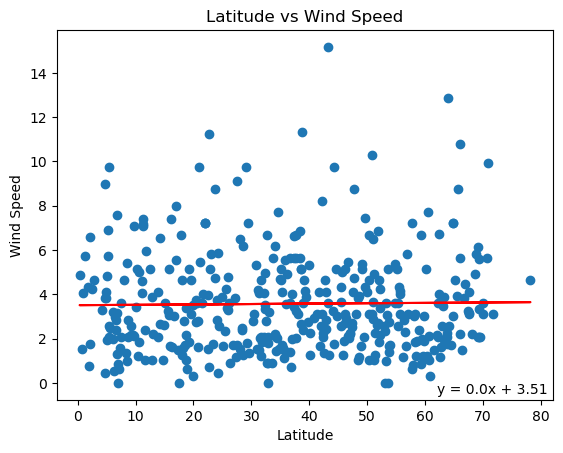

In [37]:
# Northern Hemisphere
nh_w = nh_df["Wind Speed"]
calculate_linear_regression(nh_lat, nh_w, "Latitude", "Wind Speed", "Latitude vs Wind Speed", (62, -.5)) 

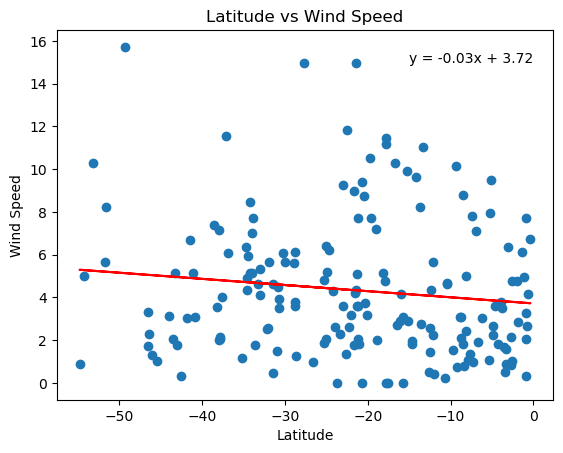

In [40]:
# Southern Hemisphere
sh_w = sh_df["Wind Speed"]
calculate_linear_regression(sh_lat, sh_w, "Latitude", "Wind Speed", "Latitude vs Wind Speed", (-15, 15)) 

**Discussion about the linear relationship:** In the Nothern and Southern Hemisphere there is a low correlation coefficient because the data points are scattered widely around the scatter plot the line, it shows no pattern, between the latitude and wind speed levels.